# Detection and Classification of bone fracture Based on Machine Learning Techniques

### Methodology 
1. Preprocessing
    - **Median** Filter & **Gaussian** Filter for removing salt and pepper noise
    - **Histogram equalization** used for Brightness, Darkness and Contrast Noise  
2. Feature Extraction 
3. ML Algorithms
4. Result & Accuracy 


Text(0.5, 1.0, 'Original')

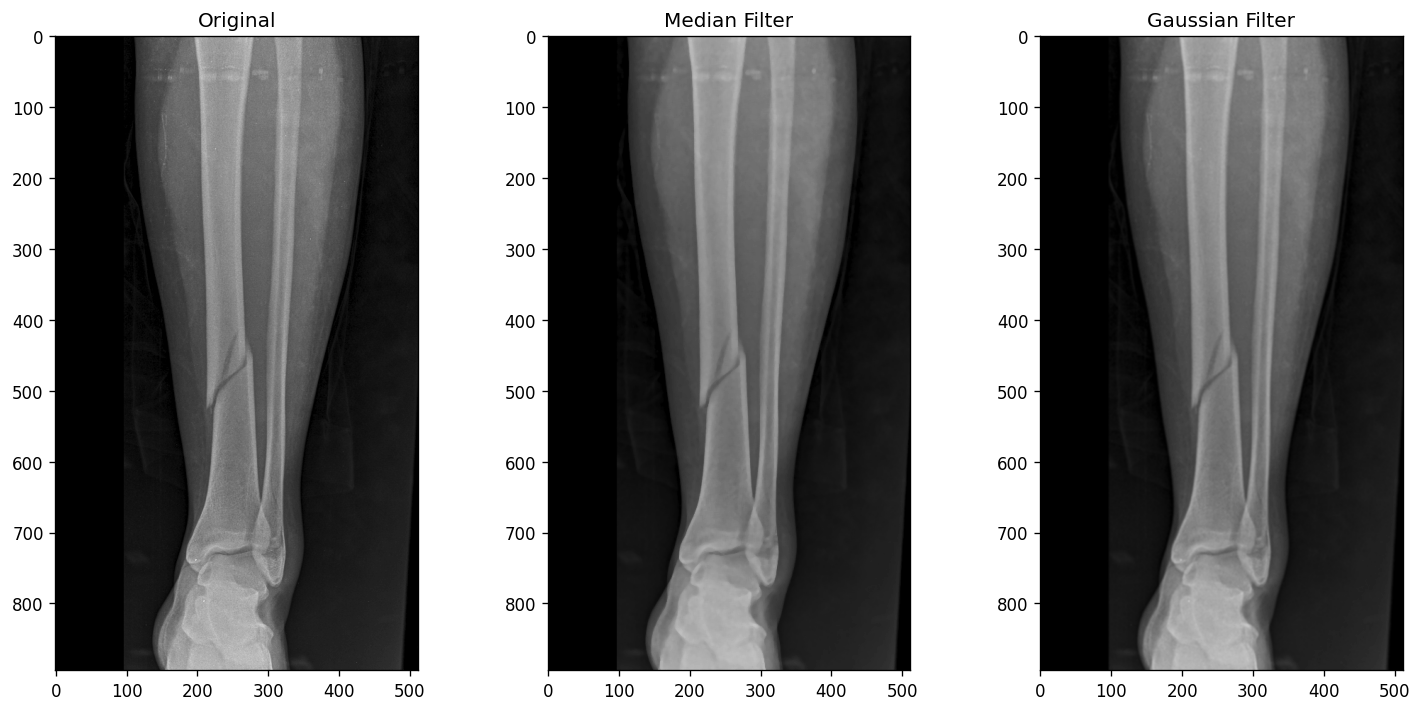

In [110]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('images/sample1.jpg', 0)

median = cv2.medianBlur(img, 5)
gauss = cv2.GaussianBlur(img, (5, 5), 0)

fg, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 7), dpi=120)
ax[2].imshow(gauss, cmap='gray', vmin=0, vmax=255)
ax[2].set_title("Gaussian Filter")
ax[1].imshow(median, cmap='gray', vmin=0, vmax=255)
ax[1].set_title("Median Filter")
ax[0].imshow(img, cmap='gray', vmin=0, vmax=255)
ax[0].set_title("Original")

### 1.2 Apply Histogram Equalization
[reference](https://medium.com/@kyawsawhtoon/a-tutorial-to-histogram-equalization-497600f270e2)

Text(0.5, 1.0, 'Original')

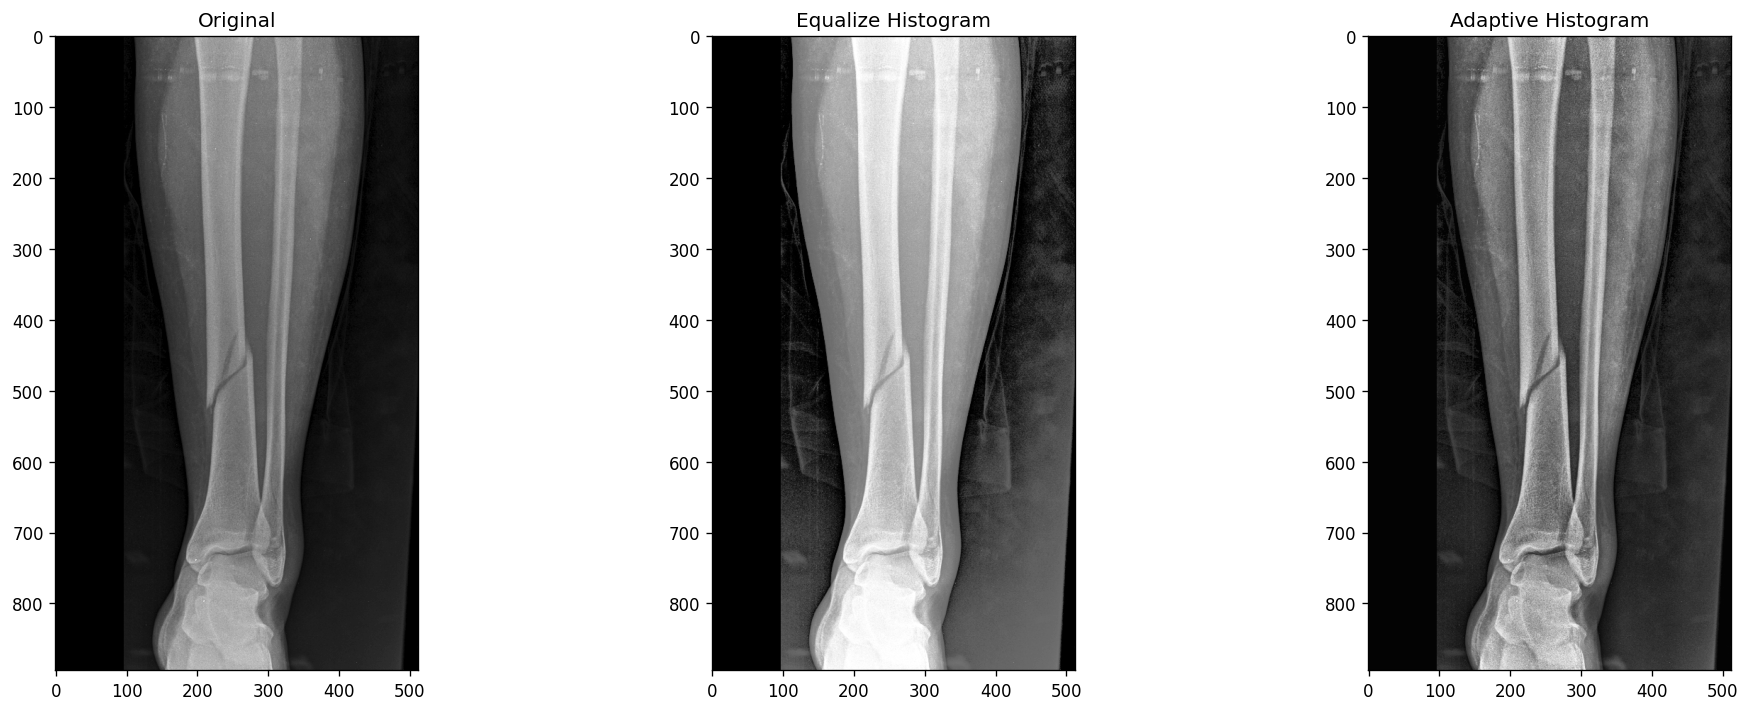

In [111]:
# Histogram Equalization
equalize_hist = cv2.equalizeHist(img)
# Contrastive Limited Adaptive Equalization
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
adaptive_hist = clahe.apply(img)

fg, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 7), dpi=120)
ax[2].imshow(adaptive_hist, cmap='gray', vmin=0, vmax=255)
ax[2].set_title("Adaptive Histogram")
ax[1].imshow(equalize_hist, cmap='gray', vmin=0, vmax=255)
ax[1].set_title("Equalize Histogram")
ax[0].imshow(img, cmap='gray', vmin=0, vmax=255)
ax[0].set_title("Original")


### 1.3 Bright and Contrast Adjustment

Text(0.5, 1.0, 'Original')

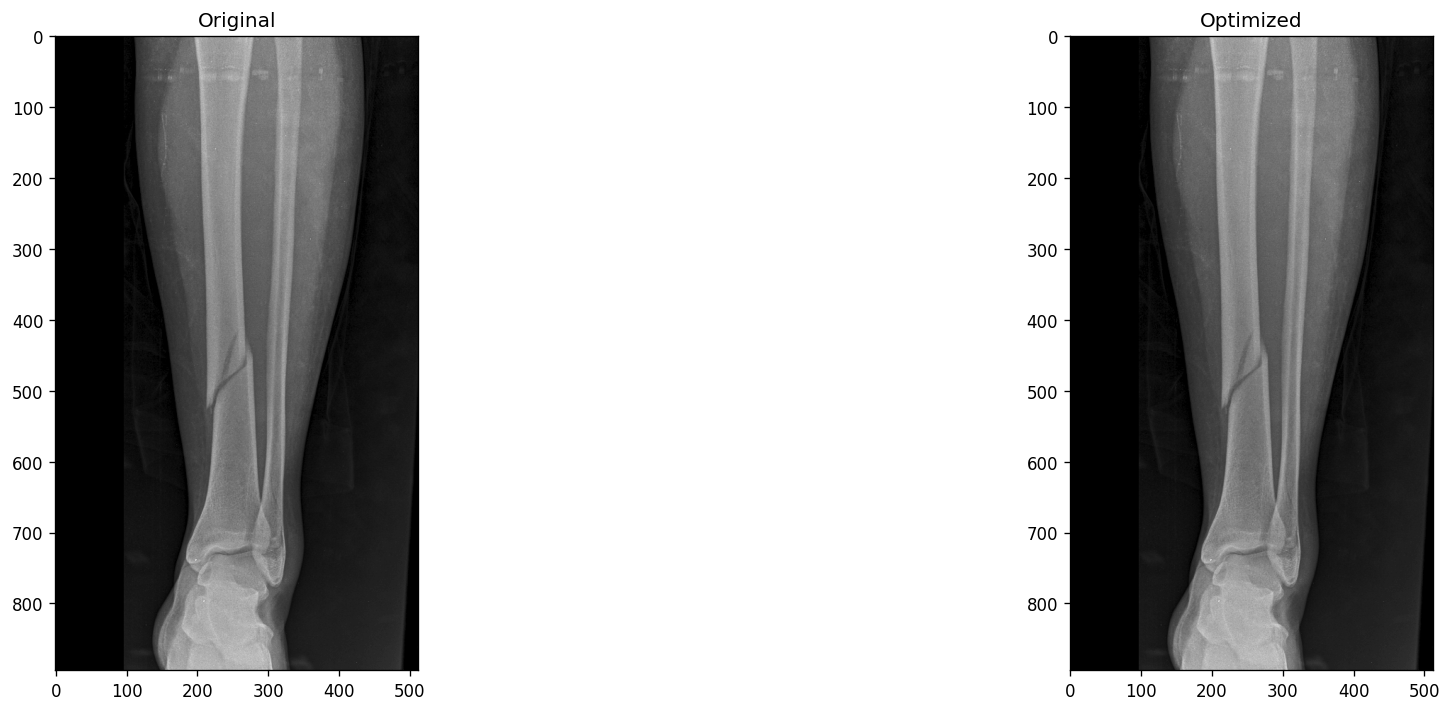

In [115]:
def apply_brightness_contrast(input_img, brightness = 0, contrast = 0):

    if brightness != 0:
        if brightness > 0:
            shadow = brightness
            highlight = 255
        else:
            shadow = 0
            highlight = 255 + brightness
        alpha_b = (highlight - shadow)/255
        gamma_b = shadow

        buf = cv2.addWeighted(input_img, alpha_b, input_img, 0, gamma_b)
    else:
        buf = input_img.copy()

    if contrast != 0:
        f = 131*(contrast + 127)/(127*(131-contrast))
        alpha_c = f
        gamma_c = 127*(1-f)

        buf = cv2.addWeighted(buf, alpha_c, buf, 0, gamma_c)

    return buf

# img = cv2.imread("images/sample2.jpg", 0)
optimized_img = apply_brightness_contrast(img, brightness=-20, contrast=40)

fg, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 7), dpi=120)
ax[1].imshow(optimized_img, cmap='gray', vmin=0, vmax=255)
ax[1].set_title("Optimized")
ax[0].imshow(img, cmap='gray', vmin=0, vmax=255)
ax[0].set_title("Original")